**Simple linear regression Calories.Consumed problem .**

A certain food based company conducted a survey with the help of a fitness company spread across the country to find  relationship between a person’s weight gain and the no of calories consumed by them in order to come up a diet plan for individuals that fall under different weight groups. Approach - A Simple Linear regression model needs to be built with target variable ‘Calories.Consumed’.

**In this problem we have to record RMSE values, Correlation coefficient values for different transform models.**

Business objective: To find the correlation coefficient values.


Constraints: 
         1.Estimate the parameters of the model.
2.Perform statistical inferences on these parameters.

At first,we need to understand the data and hence we load the same and the libraries required

In [ ]:
# Importing necessary libraries
import pandas as pd # deals with data frame        # for Data Manipulation\n",
import numpy as np  # deals with numerical values  # for Mathematical calculations\n",

wcat = pd.read_csv(D:/7 data mining/supervised/linear regresstion/assignment/calories_consumed.csv")

####We have two columns in our dataset, Weight gain and calories consumed.
wcat.describe()
                WG           CC
count    14.000000    14.000000
mean    357.714286  2340.714286
std     333.692495   752.109488
min      62.000000  1400.000000
25%     114.500000  1727.500000
50%     200.000000  2250.000000
75%     537.500000  2775.000000
max    1100.000000  3900.000000
### Describe methos is used for calculating statical data like mean, Std, percentile, min & max values. 

#Graphical Representation
import matplotlib.pyplot as plt         # mostly used for visualization purposes 

plt.bar(height = wcat.CC, x = np.arange(1, 15, 1))
plt.hist(wcat.CC) #histogram
plt.boxplot(wcat.CC)




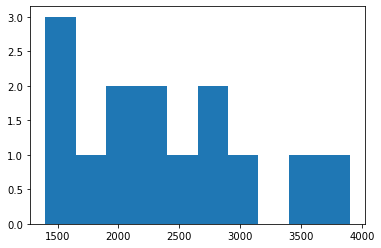

In [ ]:
plt.bar(height = wcat.WG, x = np.arange(1, 15, 1))
plt.hist(wcat.WG) #histogram
plt.boxplot(wcat.WG) #boxplot
## As we can see in boxplot that there is no outliers. 

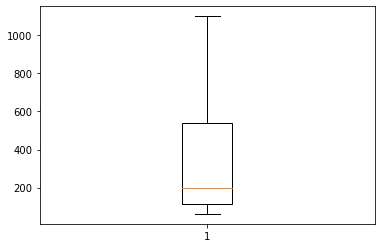

In [ ]:
# Scatter plot
plt.scatter(x = wcat['WG'], y = wcat['CC'], color = 'green') 

#####This function is used for type of plot that shows the data as a collection of points.

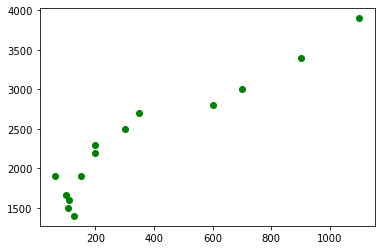

In [ ]:
###### This function is used to measure the strength of the relationship between two variables and we get good correlation b/w Weight gain and calories consumed column.
###### And the correlation coefficient value is given below.
# correlation
np.corrcoef(wcat.WG, wcat.CC) 

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

# Covariance
cov_output = np.cov(wcat.WG, wcat.CC)[0, 1]
cov_output
Out[15]: 237669.4505494506
# Import library
import statsmodels.formula.api as smf
# Simple Linear Regression
model = smf.ols('CC ~ WG', data = wcat).fit()
model.summary()
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CC   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.86e-07
Time:                        16:01:23   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1577.2007    100.541     15.687      0.000    1358.141    1796.260
WG             2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
pred1 = model.predict(pd.DataFrame(wcat['WG']))

# Regression Line
plt.scatter(wcat.WG, wcat.CC)
plt.plot(wcat.WG, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()
##Error calculation
res1 = wcat.CC - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1
Out[28]: 232.8335007096088

#### This method is used measuring the difference between values predicted by a model and their actual values. and the root mean square error 1 is 232.833.

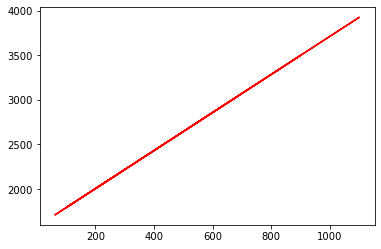

In [ ]:
######### Model building on Transformed Data
plt.scatter(x = np.log(wcat['WG']), y = wcat['CC'], color = 'brown')
np.corrcoef(np.log(wcat.WG), wcat.CC) #correlation
model2 = smf.ols('CC ~ np.log(WG)', data = wcat).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(wcat['WG']))
# Regression Line
plt.scatter(np.log(wcat.WG), wcat.CC)
plt.plot(np.log(wcat.WG), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

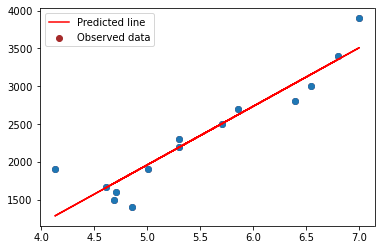

In [ ]:
# Error calculation
res2 = wcat.CC - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation
# x = waist; y = log(at)
plt.scatter(x = wcat['WG'], y = np.log(wcat['CC']), color = 'orange')
np.corrcoef(wcat.WG, np.log(wcat.CC)) #correlation
model3 = smf.ols('np.log(CC) ~ WG', data = wcat).fit()
model3.summary()
##<class 'statsmodels.iolib.summary.Summary'>
##"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CC)   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.25e-05
Time:                        16:06:17   Log-Likelihood:                 8.3130
No. Observations:                  14   AIC:                            -12.63
Df Residuals:                      12   BIC:                            -11.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4068      0.058    128.367      0.000       7.281       7.533
WG             0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


pred3 = model3.predict(pd.DataFrame(wcat['WG']))
pred3_at = np.exp(pred3)
pred3_at

0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

# Regression Line
plt.scatter(wcat.WG, np.log(wcat.CC))
plt.plot(wcat.WG, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()
# Error calculation
res3 = wcat.CC - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048496
######## This method is used measuring the difference between values predicted by a model and their actual values. and the root mean square error 3 is 272.420.
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)
model4 = smf.ols('np.log(CC) ~ WG + I(WG*WG)', data = wcat).fit()
model4.summary()

"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CC)   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     31.55
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.78e-05
Time:                        16:09:32   Log-Likelihood:                 10.125
No. Observations:                  14   AIC:                            -14.25
Df Residuals:                      11   BIC:                            -12.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2892      0.084     86.724      0.000       7.104       7.474
WG             0.0017      0.000      3.560      0.004       0.001       0.003
I(WG * WG) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

0     1739.606122
1     1986.232241
2     3556.374964
3     1986.232241
4     2260.501362
5     1744.868700
6     1792.457905
7     1620.099409
8     3038.496984
9     3657.476403
10    1718.608337
11    1851.135743
12    2397.660886
13    3251.772007
dtype: float64

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values
plt.scatter(wcat.WG, np.log(wcat.CC))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

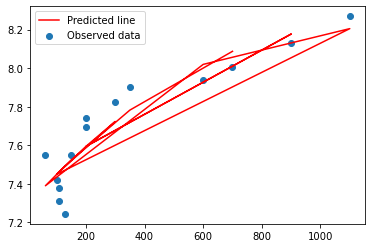

In [ ]:
# Error calculation
res4 = wcat.CC - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

##240.82777570404056
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse
###################
# The best model
from sklearn.model_selection import train_test_split
train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(CC) ~ WG + I(WG*WG)', data = train).fit()
finalmodel.summary()

###                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CC)   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     20.63
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000696
Time:                        16:12:31   Log-Likelihood:                 7.0940
No. Observations:                  11   AIC:                            -8.188
Df Residuals:                       8   BIC:                            -6.994
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2702      0.099     73.452      0.000       7.042       7.498
WG             0.0017      0.001      3.164      0.013       0.000       0.003
I(WG * WG) -7.513e-07   4.81e-07     -1.561      0.157   -1.86e-06    3.58e-07
==============================================================================
Omnibus:                        0.807   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.615
Skew:                          -0.134   Prob(JB):                        0.735
Kurtosis:                       1.873   Cond. No.                     9.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_CC = np.exp(test_pred)
pred_test_CC

# Model Evaluation on Test data
test_res = test.CC - pred_test_CC
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_CC = np.exp(train_pred)
pred_train_CC
##3     1959.000895
11    1823.167767
2     3611.240780
dtype: float64

# Model Evaluation on train data
train_res = train.CC- pred_train_CC
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse
190.2686061886463

Result: the data interpretation from the graphs and calculations above indicates that the proportion of weight gain and calories consumed by an individual falls
under correlation coefficient.

